   order_id      order_placed_at          order_delivered_at
0   1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1   1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2   1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3   1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4   1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056
count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time, dtype: float64

95th Percentile Delivery Time: 27.26 minutes

Late Orders: 557
Late Order Percentage: 3.71%

Outlier Limit: 20.29 minutes
Number of Outliers: 1734


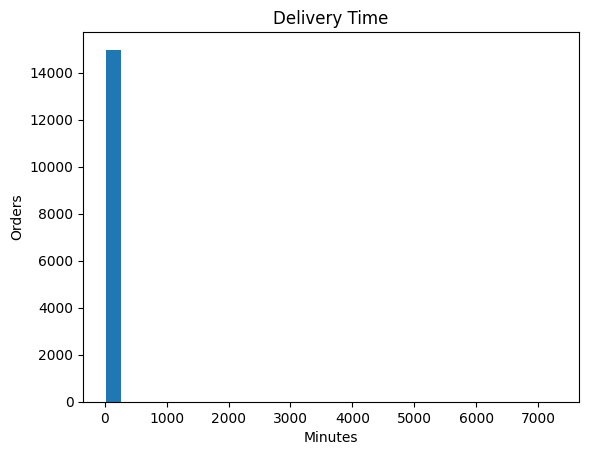

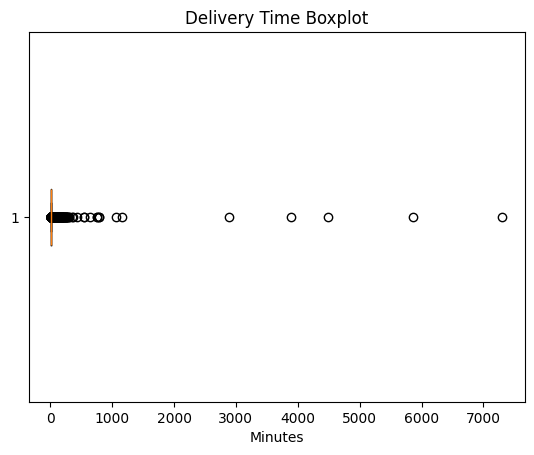

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv("/content/drive/MyDrive/Innomatics Research Labs/diminos_data.csv")
print(data.head())

# Converting date columns to datetime

data['order_placed_at'] = pd.to_datetime(data['order_placed_at'])
data['order_delivered_at'] = pd.to_datetime(data['order_delivered_at'])

# Calculating delivery time in minutes

data['delivery_time'] = (data['order_delivered_at'] - data['order_placed_at']).dt.total_seconds() / 60
print(data['delivery_time'].describe())

# Calculating 95th percentile

p95 = data['delivery_time'].quantile(0.95)
print(f"\n95th Percentile Delivery Time: {p95:.2f} minutes")

# Late orders

late = data[data['delivery_time'] > 31]
late_percent = len(late) / len(data) * 100
print(f"\nLate Orders: {len(late)}")
print(f"Late Order Percentage: {late_percent:.2f}%")

# Outlier detection

q1 = data['delivery_time'].quantile(0.25)
q3 = data['delivery_time'].quantile(0.75)
iqr = q3 - q1
limit = q3 + 1.5 * iqr
outliers = data[data['delivery_time'] > limit]
print(f"\nOutlier Limit: {limit:.2f} minutes")
print(f"Number of Outliers: {len(outliers)}")

# Plot histogram

plt.figure()
plt.hist(data['delivery_time'], bins=30)
plt.title("Delivery Time")
plt.xlabel("Minutes")
plt.ylabel("Orders")
plt.show()

# Plot boxplot

plt.figure()
plt.boxplot(data['delivery_time'], vert=False)
plt.title("Delivery Time Boxplot")
plt.xlabel("Minutes")
plt.show()

# Save cleaned data

data.to_csv("/content/diminos_cleaned.csv", index=False)

# Insights

# Delivery Performance:
The average delivery time is around 20 minutes, which shows that most orders are delivered well within the promised 31 minutes.

#Late Orders:
Only about 3 to 4% of orders are late.
This means that more than 96% of customers receive their order on time.

# Outlier Analysis:
A few orders have very large delivery times compared to the rest.These are treated as outliers and cleaning of data should be done.

# Distribution (Histogram & Boxplot)
The histogram shows a right-skewed distribution, meaning:
Most deliveries are fast,
A few deliveries take much longer and create a long tail.
The boxplot confirms the presence of extreme values (outliers).

#Conclusion:
Kanav’s pizza store is currently performing well and satisfies Diminos’ delivery performance criteria.
The 95th percentile delivery time is within the required limit, and the percentage of late orders is low.
However, there are a few delayed and extreme cases that should be monitored and reduced to improve customer satisfaction and avoid revenue loss.